# Trabajo Práctico 3: detectando barcos en el agua!

In [72]:
import numpy as np 
import pandas as pd
import glob
import os
import matplotlib.pyplot as plot
from random import randint
from PIL import Image

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras.utils import to_categorical

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM

import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.gridspec as gridspec


In [2]:
# Impor all images from folder imagenes_tp3_cv

images = []
labels = []
for f in glob.iglob('./imagenes_tp3_cv/*'):
    images.append(np.asarray(Image.open(f)))
    labels.append(np.asarray(f[18:19]))

# Convert the list of images to numpy array
images = np.array(images)
labels = np.array(labels)

print("Shape of Images:",images.shape)
print("Shape of Labels:",labels)

Shape of Images: (4000, 80, 80, 3)
Shape of Labels: ['0' '0' '0' ... '0' '1' '0']


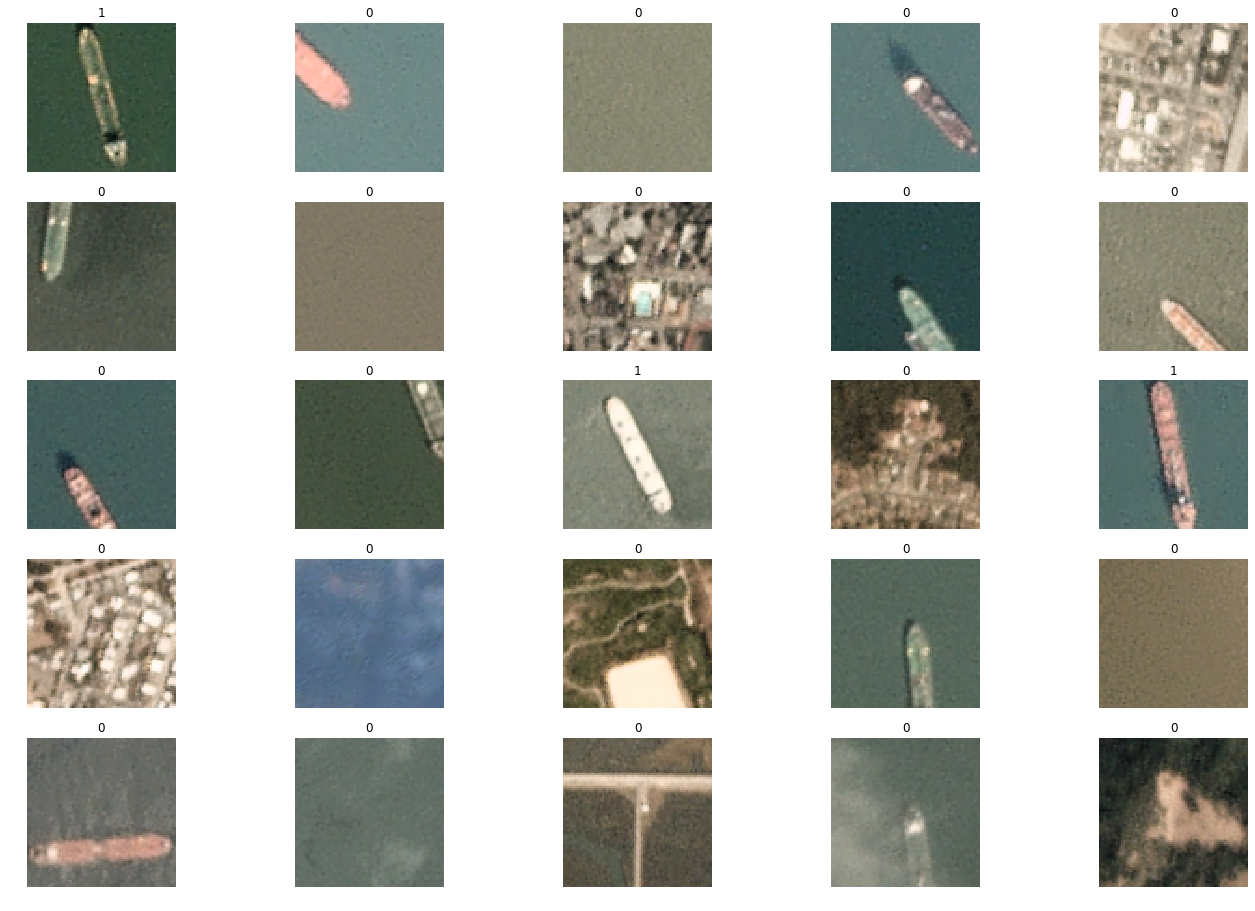

In [3]:
# Print random Images from the list

f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(images))
        ax[i,j].imshow(images[rnd_number])
        ax[i,j].set_title(labels[rnd_number])
        ax[i,j].axis('off')

In [4]:
# Split in Test and Train

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size = 0.2, random_state=5)

# Modelo 1 : CNN

In [4]:
# Create the model 

model = Models.Sequential()

model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu',input_shape=(80,80,3)))
model.add(Layers.Conv2D(60,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(60,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(40,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(60,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dense(40,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(2,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 100)       2800      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 60)        54060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 60)        32460     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 50)        27050     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [5]:
# Train the model

trained = model.fit(images_train,labels_train,epochs=10,validation_split=0.30)

Train on 2800 samples, validate on 1200 samples
Epoch 1/10
2800/2800 [==============================] - 148s 53ms/sample - loss: 0.6092 - acc: 0.7175 - val_loss: 0.4473 - val_acc: 0.8392
Epoch 2/10
2800/2800 [==============================] - 156s 56ms/sample - loss: 0.4357 - acc: 0.8271 - val_loss: 0.2973 - val_acc: 0.8808
Epoch 3/10
2800/2800 [==============================] - 155s 55ms/sample - loss: 0.3158 - acc: 0.8836 - val_loss: 0.2880 - val_acc: 0.8808
Epoch 4/10
2800/2800 [==============================] - 157s 56ms/sample - loss: 0.2449 - acc: 0.9136 - val_loss: 0.1960 - val_acc: 0.9217
Epoch 5/10
2800/2800 [==============================] - 162s 58ms/sample - loss: 0.2161 - acc: 0.9225 - val_loss: 0.1609 - val_acc: 0.9392
Epoch 6/10
2800/2800 [==============================] - 160s 57ms/sample - loss: 0.1963 - acc: 0.9346 - val_loss: 0.1645 - val_acc: 0.9417
Epoch 7/10
2800/2800 [==============================] - 160s 57ms/sample - loss: 0.1552 - acc: 0.9475 - val_loss: 0.17

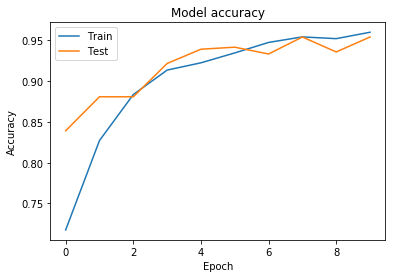

In [6]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train_Accuracy', 'Validation_Accuracy'], loc='upper left')
plot.show()

In [32]:
model.evaluate(images_test,labels_test, verbose=1)

3200/3200 [==============================] - 49s 15ms/sample - loss: 0.0950 - acc: 0.9653


[0.09495851538144053, 0.9653125]

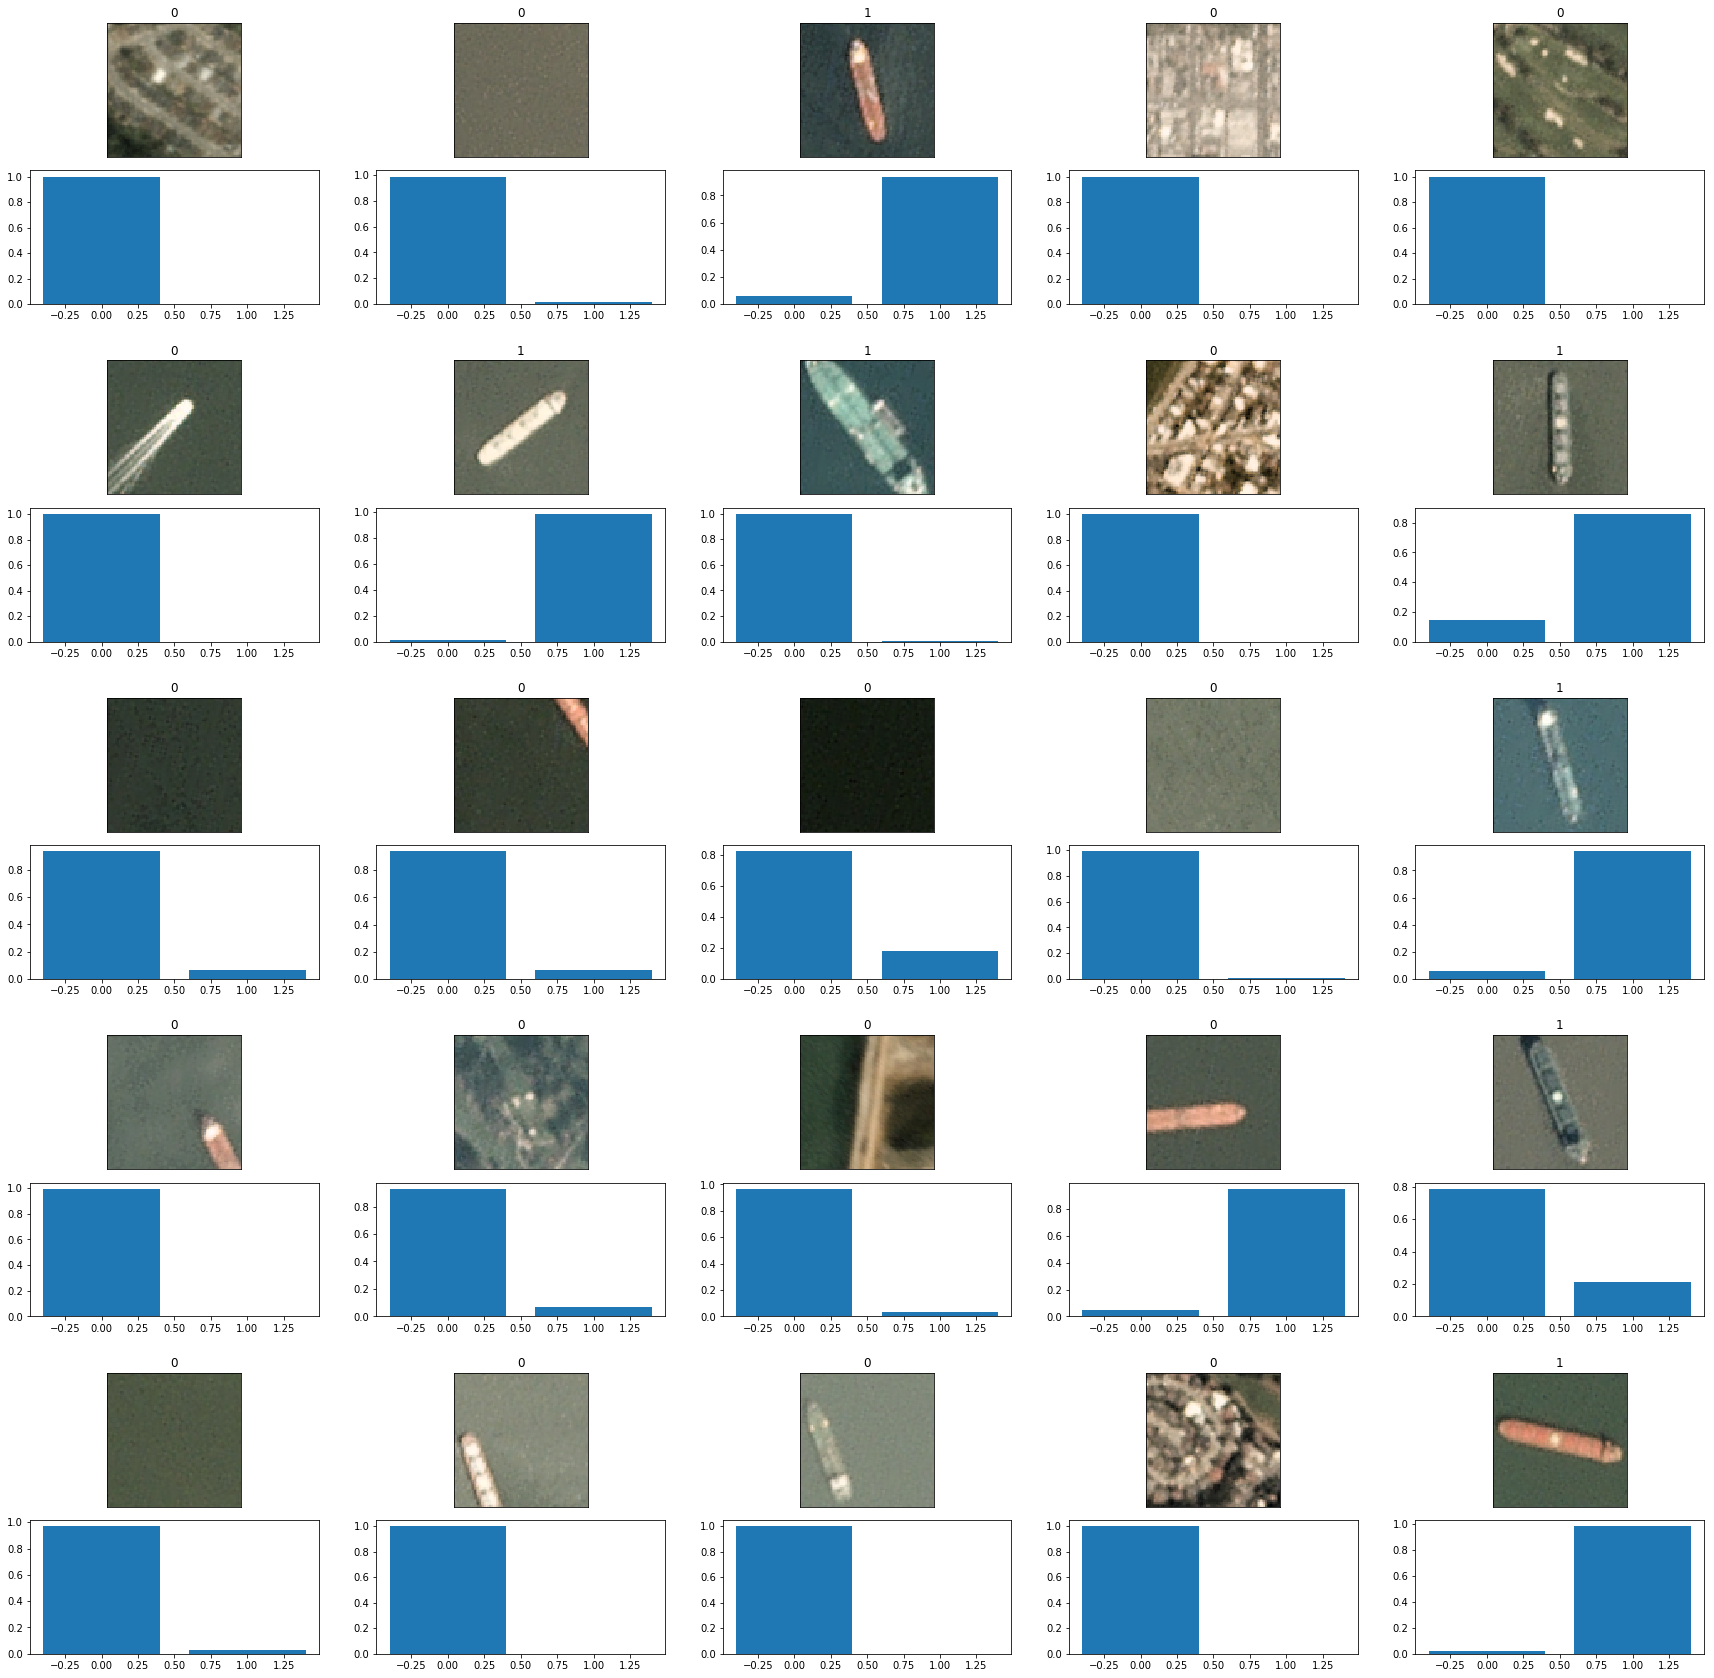

In [42]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(images_test))
    pred_image = np.array([images_test[rnd_number]])
    pred_class = labels_test[rnd_number]
    pred_prob = model.predict(pred_image).reshape(2)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1],pred_prob)
            fig.add_subplot(ax)


fig.show()

# Modelo 2: MLP

In [73]:
# Create model 2
model2 = Models.Sequential()

model2.add(Layers.Flatten(input_shape=images_train.shape[1:]))
model2.add(Layers.Dense(1000, activation="relu"))
model2.add(Layers.Dropout(0.2))
model2.add(Layers.Dense(512, activation="relu"))
model2.add(Layers.Dropout(0.2))
model2.add(Layers.Dense(2, activation="softmax"))
    
# Compile the model 2
opt = Optimizer.SGD(lr=0.01)
model2.compile(loss="categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 19200)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 1000)              19201000  
_________________________________________________________________
dropout_29 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 1026      
Total params: 19,714,538
Trainable params: 19,714,538
Non-trainable params: 0
________________________________________________________________

# Preprocesado de los datos

In [64]:
images_train_p = images_train.astype("float32") / 255
images_test_p = images_test.astype("float32") / 255
labels_train_p = to_categorical(labels_train, 2)
labels_test_p = to_categorical(labels_test, 2)

In [76]:
# Train the model 2

trained2 = model2.fit(images_train_p,labels_train_p,epochs=10,validation_split=0.30)

Train on 2240 samples, validate on 960 samples
Epoch 1/10
2240/2240 [==============================] - 12s 5ms/sample - loss: 0.3373 - acc: 0.8687 - val_loss: 0.2736 - val_acc: 0.8844
Epoch 2/10
2240/2240 [==============================] - 12s 5ms/sample - loss: 0.3106 - acc: 0.8692 - val_loss: 0.2842 - val_acc: 0.8729
Epoch 3/10
2240/2240 [==============================] - 14s 6ms/sample - loss: 0.3093 - acc: 0.8719 - val_loss: 0.2579 - val_acc: 0.8875
Epoch 4/10
2240/2240 [==============================] - 14s 6ms/sample - loss: 0.2901 - acc: 0.8813 - val_loss: 0.2882 - val_acc: 0.8969
Epoch 5/10
2240/2240 [==============================] - 14s 6ms/sample - loss: 0.2923 - acc: 0.8777 - val_loss: 0.3239 - val_acc: 0.8646
Epoch 6/10
2240/2240 [==============================] - 12s 5ms/sample - loss: 0.2725 - acc: 0.8879 - val_loss: 0.2401 - val_acc: 0.9115
Epoch 7/10
2240/2240 [==============================] - 12s 5ms/sample - loss: 0.2457 - acc: 0.9040 - val_loss: 0.2767 - val_acc: 0

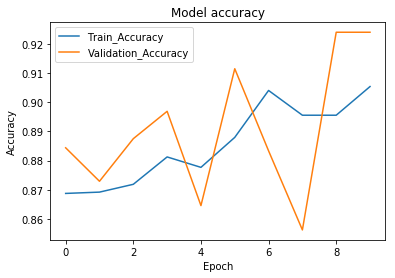

In [77]:
plot.plot(trained2.history['acc'])
plot.plot(trained2.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train_Accuracy', 'Validation_Accuracy'], loc='upper left')
plot.show()

# Evaluacion del modelo

In [79]:
model2.evaluate(images_test_p,labels_test_p, verbose=1)

800/800 [==============================] - 1s 1ms/sample - loss: 0.1914 - acc: 0.9300


[0.1913832361996174, 0.93]

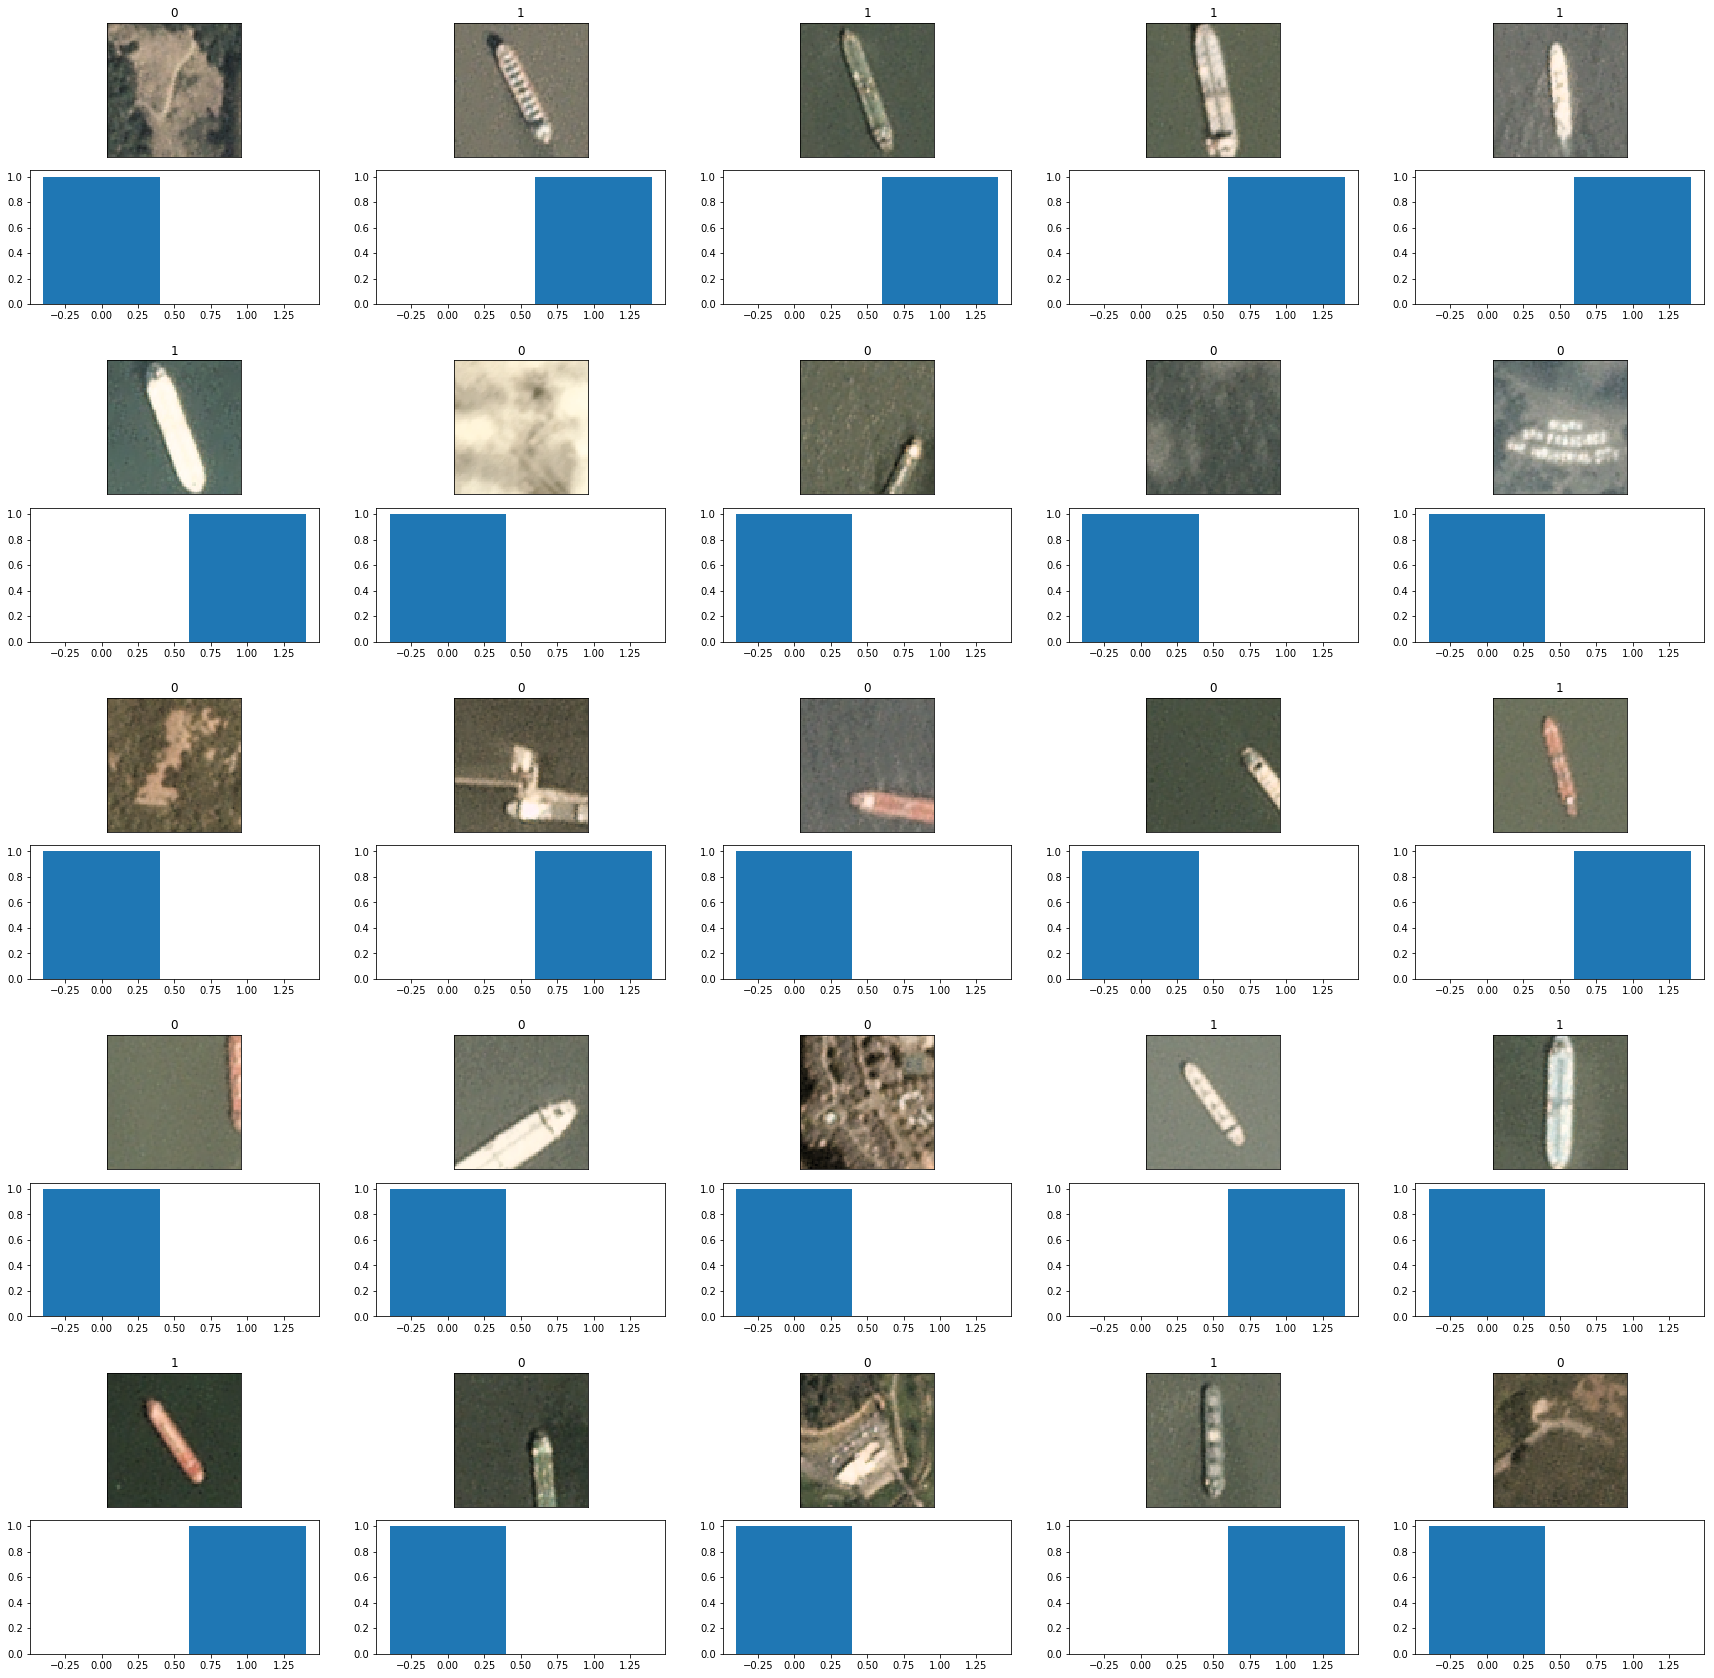

In [80]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(images_test))
    pred_image = np.array([images_test[rnd_number]])
    pred_class = labels_test[rnd_number]
    pred_prob = model2.predict(pred_image).reshape(2)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1],pred_prob)
            fig.add_subplot(ax)


fig.show()

# Conclusiones

Luego de entrenar y evaluar ambos modelos, notamos que ambos consiguieron buenos resultados. Sin embargo, podemos apreciar la red neuronal convolucional (CNN) obtuvo un accuracy de 96% aproximadente, superando a la red MLP, que obtuvo un 93% de esa misma metrica.